In [45]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import normalize_1D
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
sns.set_style("white")

In [46]:
bit_df_org = pd.read_csv('input\Bitcoin Price.csv').drop(columns='Unnamed: 0')
bit_df_org

,Date,High
0,0,468.174011
1,1,456.859985
2,2,427.834991
3,3,423.295990
4,4,412.425995
...,...,...
719,719,609.054993
720,720,610.830017
721,721,614.544983
722,722,628.770020


In [47]:
bitcoin_df = pd.read_csv('input\prediction bitcoin price.csv').drop(columns='Unnamed: 0')
bitcoin_df.columns = ['Bit Day 1', 'Bit Day 2', 'Bit Day 3', 'Bit Price']
bitcoin_df

,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price
0,356.93370,339.22240,348.02887,382.726013
1,387.22702,357.48690,339.28550,375.066986
2,373.90967,387.47275,359.19073,367.191010
3,370.91678,378.59848,390.54720,379.433014
4,387.58102,377.82855,385.00310,397.226013
...,...,...,...,...
697,606.59660,607.29834,607.33030,609.054993
698,613.25214,611.89020,612.09186,610.830017
699,623.02826,624.42670,624.01290,614.544983
700,624.40090,629.48816,629.83575,628.770020


In [48]:
padding = pd.DataFrame(np.full((22, 4), np.nan), columns=bitcoin_df.columns)
bitcoin_df = pd.concat([padding, bitcoin_df]).reset_index(drop=True)
bitcoin_df['Bit Price'] = bit_df_org['High']
bitcoin_df

,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price
0,NaN,NaN,NaN,468.174011
1,NaN,NaN,NaN,456.859985
2,NaN,NaN,NaN,427.834991
3,NaN,NaN,NaN,423.295990
4,NaN,NaN,NaN,412.425995
...,...,...,...,...
719,606.59660,607.29834,607.33030,609.054993
720,613.25214,611.89020,612.09186,610.830017
721,623.02826,624.42670,624.01290,614.544983
722,624.40090,629.48816,629.83575,628.770020


In [49]:
df = bitcoin_df.copy()
df['Date'] = np.arange(len(df))
df

,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Date
0,NaN,NaN,NaN,468.174011,0
1,NaN,NaN,NaN,456.859985,1
2,NaN,NaN,NaN,427.834991,2
3,NaN,NaN,NaN,423.295990,3
4,NaN,NaN,NaN,412.425995,4
...,...,...,...,...,...
719,606.59660,607.29834,607.33030,609.054993,719
720,613.25214,611.89020,612.09186,610.830017,720
721,623.02826,624.42670,624.01290,614.544983,721
722,624.40090,629.48816,629.83575,628.770020,722


In [50]:
gold_df_org = pd.read_csv('input\Gold Price.csv').drop(columns='Unnamed: 0')
gold_df_org

,Date,USD
0,0,1236.0
1,1,1220.5
2,2,1219.8
3,5,1213.5
4,6,1222.0
...,...,...
513,719,1326.4
514,720,1337.3
515,721,1348.4
516,722,1343.4


In [51]:
gold_df = pd.read_csv('input\prediction gold price.csv').drop(columns='Unnamed: 0')
gold_df.columns = ['Gold Day 1', 'Gold Day 2', 'Gold Day 3', 'Gold Price']
gold_df

,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price
0,1236.2987,1234.0890,1235.4920,1234.3
1,1242.4886,1243.2233,1241.0040,1244.5
2,1250.3278,1250.0249,1251.0919,1250.3
3,1240.9374,1240.9363,1239.7327,1243.8
4,1235.9370,1236.3188,1236.3335,1232.8
...,...,...,...,...
491,1331.4917,1327.9560,1329.0973,1326.4
492,1333.3546,1336.5466,1334.6826,1337.3
493,1341.1530,1338.6545,1340.3798,1348.4
494,1348.4114,1343.7649,1342.3885,1343.4


In [52]:
padding = pd.DataFrame(np.full((22, 4), np.nan), columns=gold_df.columns)
gold_df = pd.concat([padding, gold_df]).reset_index(drop=True)
gold_df['Gold Price'] = gold_df_org['USD']
gold_df['Date'] = gold_df_org['Date']
gold_df

,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Date
0,NaN,NaN,NaN,1236.0,0
1,NaN,NaN,NaN,1220.5,1
2,NaN,NaN,NaN,1219.8,2
3,NaN,NaN,NaN,1213.5,5
4,NaN,NaN,NaN,1222.0,6
...,...,...,...,...,...
513,1331.4917,1327.9560,1329.0973,1326.4,719
514,1333.3546,1336.5466,1334.6826,1337.3,720
515,1341.1530,1338.6545,1340.3798,1348.4,721
516,1348.4114,1343.7649,1342.3885,1343.4,722


In [53]:
df = pd.merge(df, gold_df, how='outer')
df

,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Date,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price
0,NaN,NaN,NaN,468.174011,0,NaN,NaN,NaN,1236.0
1,NaN,NaN,NaN,456.859985,1,NaN,NaN,NaN,1220.5
2,NaN,NaN,NaN,427.834991,2,NaN,NaN,NaN,1219.8
3,NaN,NaN,NaN,423.295990,3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,412.425995,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
719,606.59660,607.29834,607.33030,609.054993,719,1331.4917,1327.9560,1329.0973,1326.4
720,613.25214,611.89020,612.09186,610.830017,720,1333.3546,1336.5466,1334.6826,1337.3
721,623.02826,624.42670,624.01290,614.544983,721,1341.1530,1338.6545,1340.3798,1348.4
722,624.40090,629.48816,629.83575,628.770020,722,1348.4114,1343.7649,1342.3885,1343.4


In [54]:
df['Mask'] = df['Gold Price'].isna().apply(lambda x: 1 - int(x))
df.fillna(method='ffill', inplace=True)
cols = list(df.columns)
cols.remove('Date')
cols.remove('Mask')
cols.insert(0, 'Mask')
cols.insert(0, 'Date')
df = df[cols]

In [55]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price
0,0,1,NaN,NaN,NaN,468.174011,NaN,NaN,NaN,1236.0
1,1,1,NaN,NaN,NaN,456.859985,NaN,NaN,NaN,1220.5
2,2,1,NaN,NaN,NaN,427.834991,NaN,NaN,NaN,1219.8
3,3,0,NaN,NaN,NaN,423.295990,NaN,NaN,NaN,1219.8
4,4,0,NaN,NaN,NaN,412.425995,NaN,NaN,NaN,1219.8
...,...,...,...,...,...,...,...,...,...,...
719,719,1,606.59660,607.29834,607.33030,609.054993,1331.4917,1327.9560,1329.0973,1326.4
720,720,1,613.25214,611.89020,612.09186,610.830017,1333.3546,1336.5466,1334.6826,1337.3
721,721,1,623.02826,624.42670,624.01290,614.544983,1341.1530,1338.6545,1340.3798,1348.4
722,722,1,624.40090,629.48816,629.83575,628.770020,1348.4114,1343.7649,1342.3885,1343.4


In [56]:
df['Gold Gain'] = [np.nan] + [df['Gold Price'][i] - df['Gold Price'][i-1] for i in range(1, len(df))]
df['Bit Gain'] = [np.nan] + [df['Bit Price'][i] - df['Bit Price'][i-1] for i in range(1, len(df))]

In [57]:
def weightedMean(n, rho = 0.95):
    w = np.array([np.power(rho, i) for i in range(n)])
    return w / w.sum()

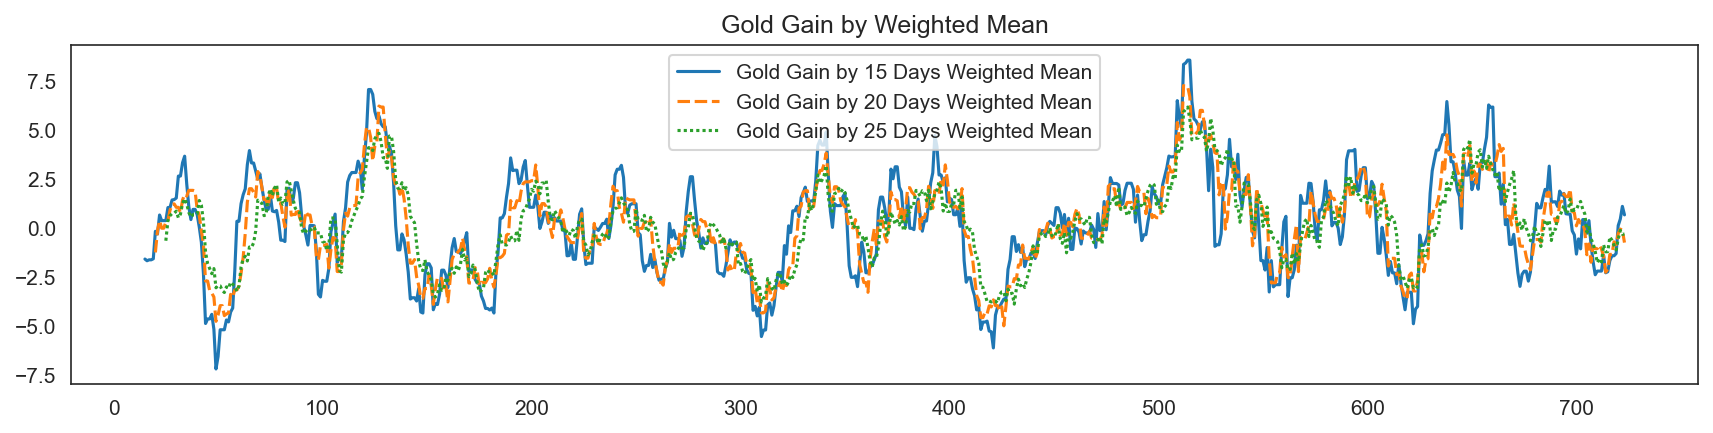

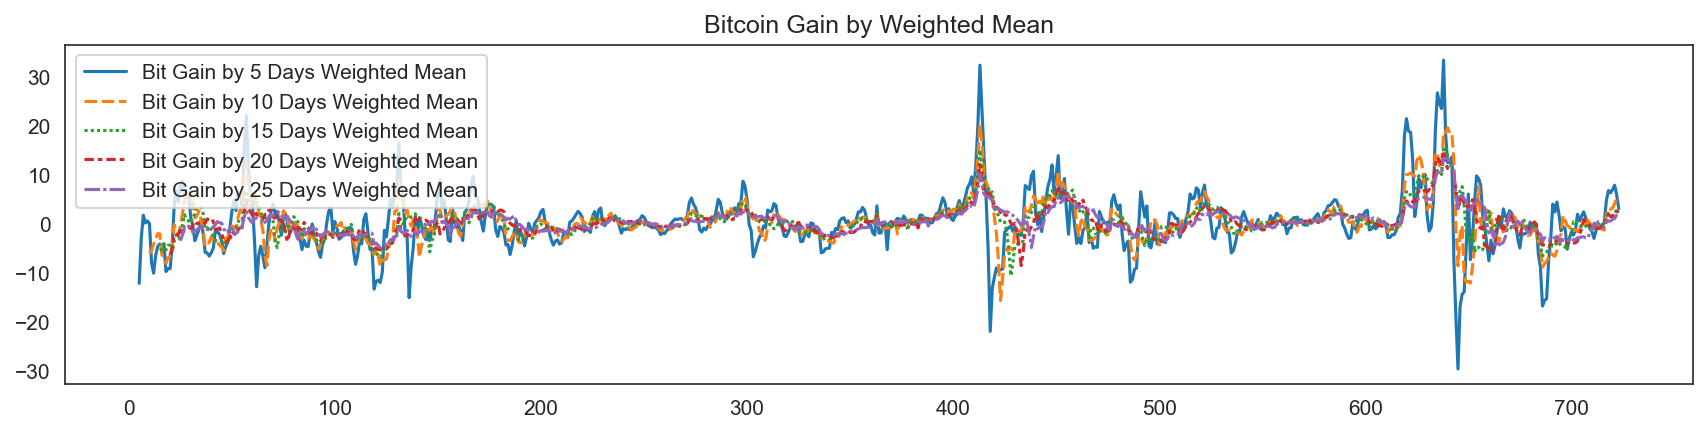

In [58]:
gain_gold_dic = {}
gain_bit_dic = {}

for i in range(15, 26, 5):
    gain_gold_dic['Gold Gain by ' + str(i) + ' Days Weighted Mean'] = df['Gold Gain'].rolling(i).mean(weight=weightedMean(i)).values
for i in range(5, 26, 5):
    gain_bit_dic['Bit Gain by ' + str(i) + ' Days Weighted Mean'] = df['Bit Gain'].rolling(i).mean(weight=weightedMean(i)).values

plt.figure(figsize=(14, 3), dpi=150)
plt.legend('best')
sns.lineplot(data=pd.DataFrame(gain_gold_dic))
plt.title('Gold Gain by Weighted Mean')
plt.savefig('results\Features\Gold Gain by Days.png')
plt.show()

plt.figure(figsize=(14, 3), dpi=150)
plt.legend('best')
sns.lineplot(data=pd.DataFrame(gain_bit_dic))
plt.title('Bitcoin Gain by Weighted Mean')
plt.savefig('results\Features\Bit Gain by Days.png')
plt.show()

In [59]:
gold_mean = df['Gold Price'].rolling(20).mean(weight=weightedMean(20)).values
df['Gold 20 Days BIAS'] = 100 * (df['Gold Price'] - gold_mean) / gold_mean
bit_mean = df['Bit Price'].rolling(5).mean(weight=weightedMean(5)).values
df['Bit 5 Days BIAS'] = 100 * (df['Bit Price'] - bit_mean) / bit_mean

In [60]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS
0,0,1,NaN,NaN,NaN,468.174011,NaN,NaN,NaN,1236.0,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,456.859985,NaN,NaN,NaN,1220.5,-15.5,-11.314026,NaN,NaN
2,2,1,NaN,NaN,NaN,427.834991,NaN,NaN,NaN,1219.8,-0.7,-29.024994,NaN,NaN
3,3,0,NaN,NaN,NaN,423.295990,NaN,NaN,NaN,1219.8,0.0,-4.539001,NaN,NaN
4,4,0,NaN,NaN,NaN,412.425995,NaN,NaN,NaN,1219.8,0.0,-10.869995,NaN,-5.778192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,1,606.59660,607.29834,607.33030,609.054993,1331.4917,1327.9560,1329.0973,1326.4,1.7,-2.781982,-0.165212,2.453584
720,720,1,613.25214,611.89020,612.09186,610.830017,1333.3546,1336.5466,1334.6826,1337.3,10.9,1.775024,0.678316,1.572571
721,721,1,623.02826,624.42670,624.01290,614.544983,1341.1530,1338.6545,1340.3798,1348.4,11.1,3.714966,1.520473,0.885096
722,722,1,624.40090,629.48816,629.83575,628.770020,1348.4114,1343.7649,1342.3885,1343.4,-5.0,14.225037,1.155449,2.237798


In [61]:
b_price = df['Bit Price']
g_price = df['Gold Price']

In [62]:
scaler = MinMaxScaler(feature_range=(-1, 1))
gold_price_scaler = MinMaxScaler(feature_range=(-1, 1))
gold_price_scaler.fit_transform(df[df.columns[9]].values.reshape(-1, 1))
bit_price_scaler = MinMaxScaler(feature_range=(-1, 1))
bit_price_scaler.fit_transform(df[df.columns[5]].values.reshape(-1, 1))
df[df.columns[[5, 9, 10, 11, 12, 13]]] = scaler.fit_transform(df[df.columns[[5, 9, 10, 11, 12, 13]]])
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS
0,0,1,NaN,NaN,NaN,-0.094255,NaN,NaN,NaN,0.177659,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.134216,NaN,NaN,NaN,0.079836,-0.512088,-0.319718,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.236731,NaN,NaN,NaN,0.075418,-0.186813,-0.582217,NaN,NaN
3,3,0,NaN,NaN,NaN,-0.252762,NaN,NaN,NaN,0.075418,-0.171429,-0.219303,NaN,NaN
4,4,0,NaN,NaN,NaN,-0.291155,NaN,NaN,NaN,0.075418,-0.171429,-0.313136,NaN,-0.534318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,1,606.59660,607.29834,607.33030,0.403330,1331.4917,1327.9560,1329.0973,0.748186,-0.134066,-0.193262,-0.240963,-0.157990
720,720,1,613.25214,611.89020,612.09186,0.409599,1333.3546,1336.5466,1334.6826,0.816977,0.068132,-0.125721,-0.125681,-0.198267
721,721,1,623.02826,624.42670,624.01290,0.422720,1341.1530,1338.6545,1340.3798,0.887031,0.072527,-0.096968,-0.010587,-0.229696
722,722,1,624.40090,629.48816,629.83575,0.472962,1348.4114,1343.7649,1342.3885,0.855475,-0.281319,0.058804,-0.060473,-0.167855


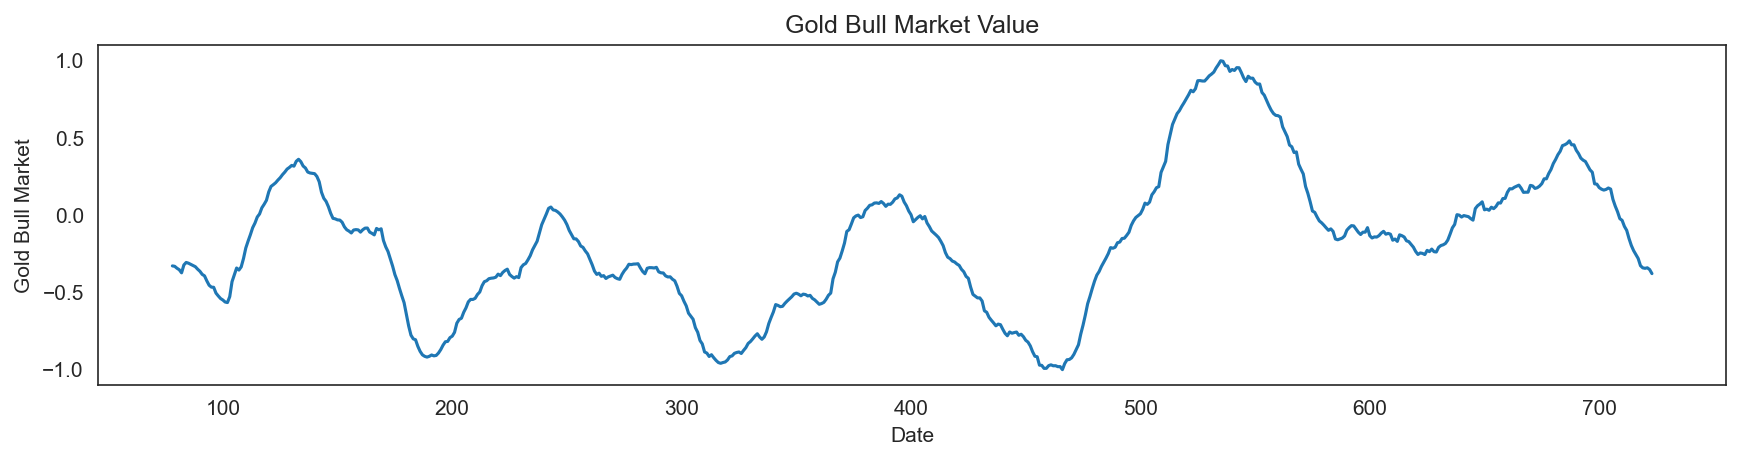

In [63]:
w = 0.42
df['Gold Bull Market'] = w * df['Gold Gain'].rolling(60).mean(weight=weightedMean(60)) + (1 - w) * df['Gold 20 Days BIAS'].rolling(60).mean(weight=weightedMean(60))
df['Gold Bull Market'] = normalize_1D(df['Gold Bull Market'].values)
plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Gold Bull Market'])
plt.title('Gold Bull Market Value')
plt.savefig('results\Features\Gold Bull Market Value.png')
plt.show()

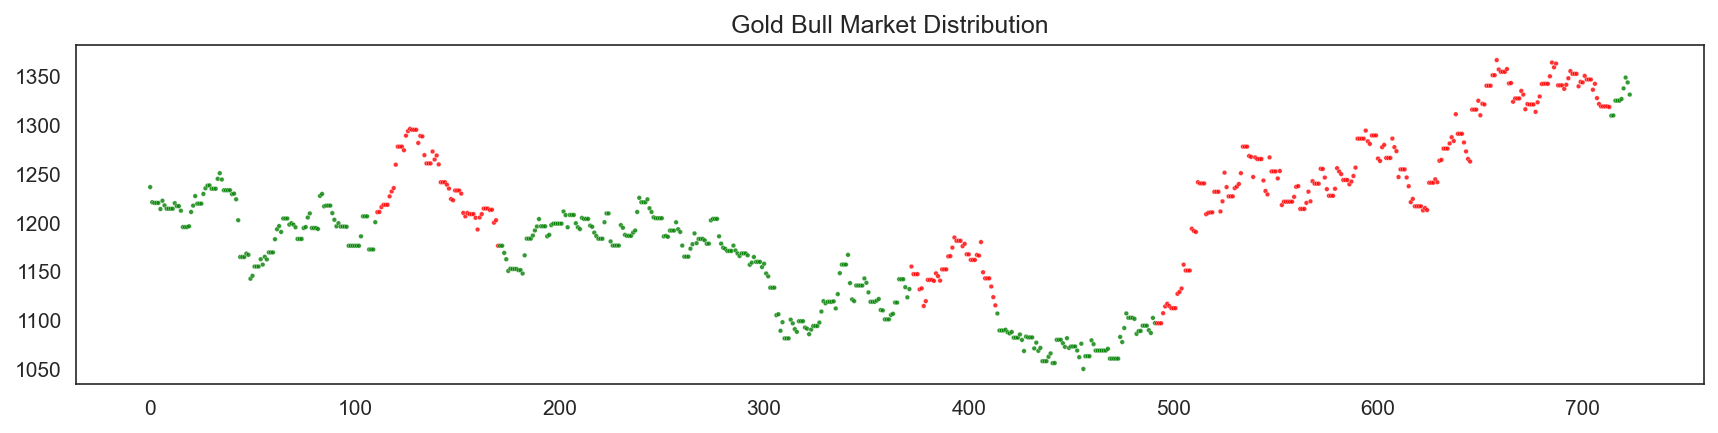

In [64]:
gold_bull = df['Gold Bull Market'] > df['Gold Bull Market'].mean()
for i in range(len(gold_bull)):
    if gold_bull[i]:
        if gold_bull[max(i - 30, 0): i + 30].sum() < 20:
            gold_bull[i] = False
for i in range(len(gold_bull)):
    if not gold_bull[i]:
        if gold_bull[max(i - 30, 0): i + 30].sum() > 40:
            gold_bull[i] = True
            
plt.figure(figsize=(14, 3), dpi=150)
sns.scatterplot(np.arange(len(df)), gold_price_scaler.inverse_transform(df['Gold Price'].values.reshape(-1, 1)).flatten(), c=gold_bull.apply(lambda x: 'r' if x else 'g'), s=5, alpha=0.8)
plt.title('Gold Bull Market Distribution')
plt.savefig('results\Features\Gold Bull Market.png')
plt.show()

In [65]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS,Gold Bull Market
0,0,1,NaN,NaN,NaN,-0.094255,NaN,NaN,NaN,0.177659,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.134216,NaN,NaN,NaN,0.079836,-0.512088,-0.319718,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.236731,NaN,NaN,NaN,0.075418,-0.186813,-0.582217,NaN,NaN,NaN
3,3,0,NaN,NaN,NaN,-0.252762,NaN,NaN,NaN,0.075418,-0.171429,-0.219303,NaN,NaN,NaN
4,4,0,NaN,NaN,NaN,-0.291155,NaN,NaN,NaN,0.075418,-0.171429,-0.313136,NaN,-0.534318,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,1,606.59660,607.29834,607.33030,0.403330,1331.4917,1327.9560,1329.0973,0.748186,-0.134066,-0.193262,-0.240963,-0.157990,-0.340918
720,720,1,613.25214,611.89020,612.09186,0.409599,1333.3546,1336.5466,1334.6826,0.816977,0.068132,-0.125721,-0.125681,-0.198267,-0.343867
721,721,1,623.02826,624.42670,624.01290,0.422720,1341.1530,1338.6545,1340.3798,0.887031,0.072527,-0.096968,-0.010587,-0.229696,-0.340583
722,722,1,624.40090,629.48816,629.83575,0.472962,1348.4114,1343.7649,1342.3885,0.855475,-0.281319,0.058804,-0.060473,-0.167855,-0.351970


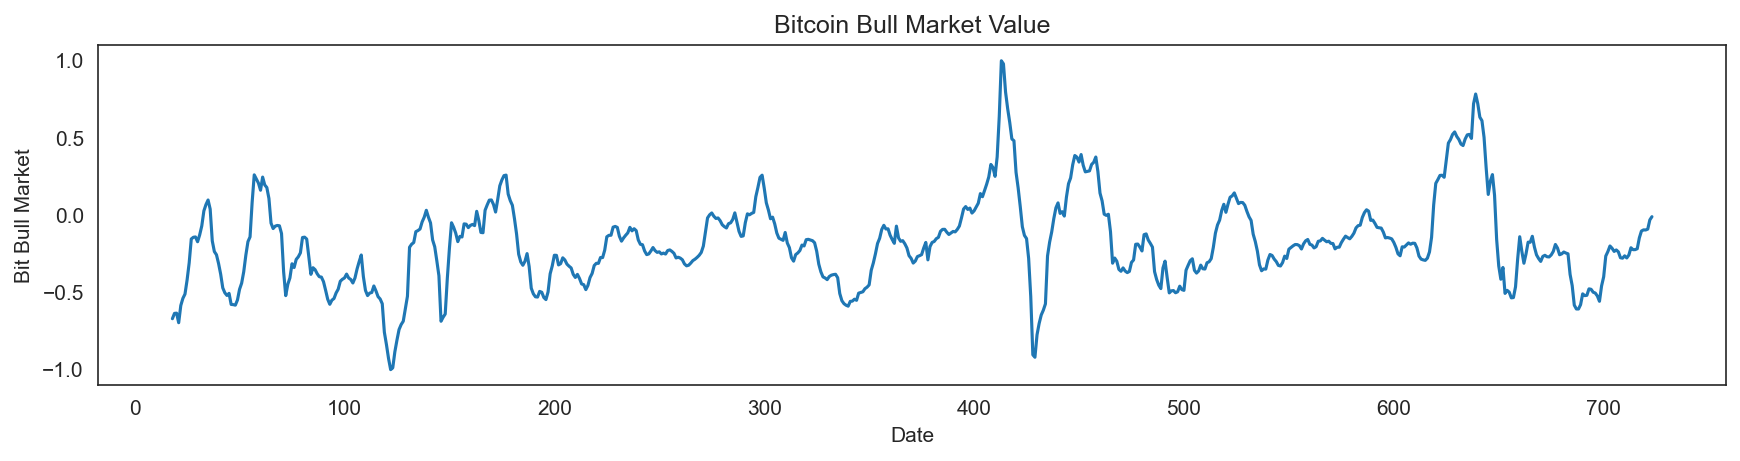

In [66]:
w = 0.42
df['Bit Bull Market'] = w * df['Bit Gain'].rolling(15).mean(weight=weightedMean(15)) + (1 - w) * df['Bit 5 Days BIAS'].rolling(15).mean(weight=weightedMean(15))
df['Bit Bull Market'] = normalize_1D(df['Bit Bull Market'].values)
plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Bit Bull Market'])
plt.title('Bitcoin Bull Market Value')
plt.savefig('results\Features\Bit Bull Market Value.png')
plt.show()

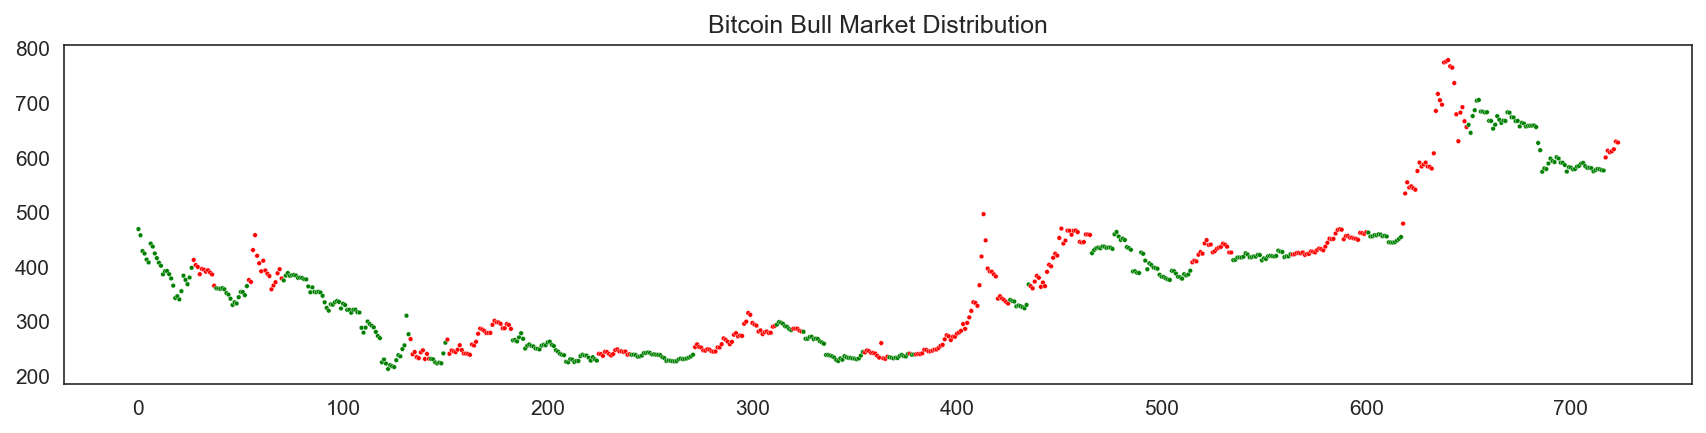

In [67]:
bit_bull = df['Bit Bull Market'] > df['Bit Bull Market'].mean()
for i in range(len(bit_bull)):
    if bit_bull[i]:
        if bit_bull[max(i - 7, 0): i + 8].sum() < 5:
            bit_bull[i] = False
for i in range(len(bit_bull)):
    if not bit_bull[i]:
        if bit_bull[max(i - 7, 0): i + 8].sum() > 10:
            bit_bull[i] = True
            
plt.figure(figsize=(14, 3), dpi=150)
sns.scatterplot(np.arange(len(df)), bit_price_scaler.inverse_transform(df['Bit Price'].values.reshape(-1, 1)).flatten(), c=bit_bull.apply(lambda x: 'r' if x else 'g'), s=5)
plt.title('Bitcoin Bull Market Distribution')
plt.savefig('results\Features\Bit Bull Market.png')
plt.show()

In [68]:
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,Gold Gain,Bit Gain,Gold 20 Days BIAS,Bit 5 Days BIAS,Gold Bull Market,Bit Bull Market
0,0,1,NaN,NaN,NaN,-0.094255,NaN,NaN,NaN,0.177659,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.134216,NaN,NaN,NaN,0.079836,-0.512088,-0.319718,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.236731,NaN,NaN,NaN,0.075418,-0.186813,-0.582217,NaN,NaN,NaN,NaN
3,3,0,NaN,NaN,NaN,-0.252762,NaN,NaN,NaN,0.075418,-0.171429,-0.219303,NaN,NaN,NaN,NaN
4,4,0,NaN,NaN,NaN,-0.291155,NaN,NaN,NaN,0.075418,-0.171429,-0.313136,NaN,-0.534318,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,1,606.59660,607.29834,607.33030,0.403330,1331.4917,1327.9560,1329.0973,0.748186,-0.134066,-0.193262,-0.240963,-0.157990,-0.340918,-0.095016
720,720,1,613.25214,611.89020,612.09186,0.409599,1333.3546,1336.5466,1334.6826,0.816977,0.068132,-0.125721,-0.125681,-0.198267,-0.343867,-0.095631
721,721,1,623.02826,624.42670,624.01290,0.422720,1341.1530,1338.6545,1340.3798,0.887031,0.072527,-0.096968,-0.010587,-0.229696,-0.340583,-0.090015
722,722,1,624.40090,629.48816,629.83575,0.472962,1348.4114,1343.7649,1342.3885,0.855475,-0.281319,0.058804,-0.060473,-0.167855,-0.351970,-0.030218


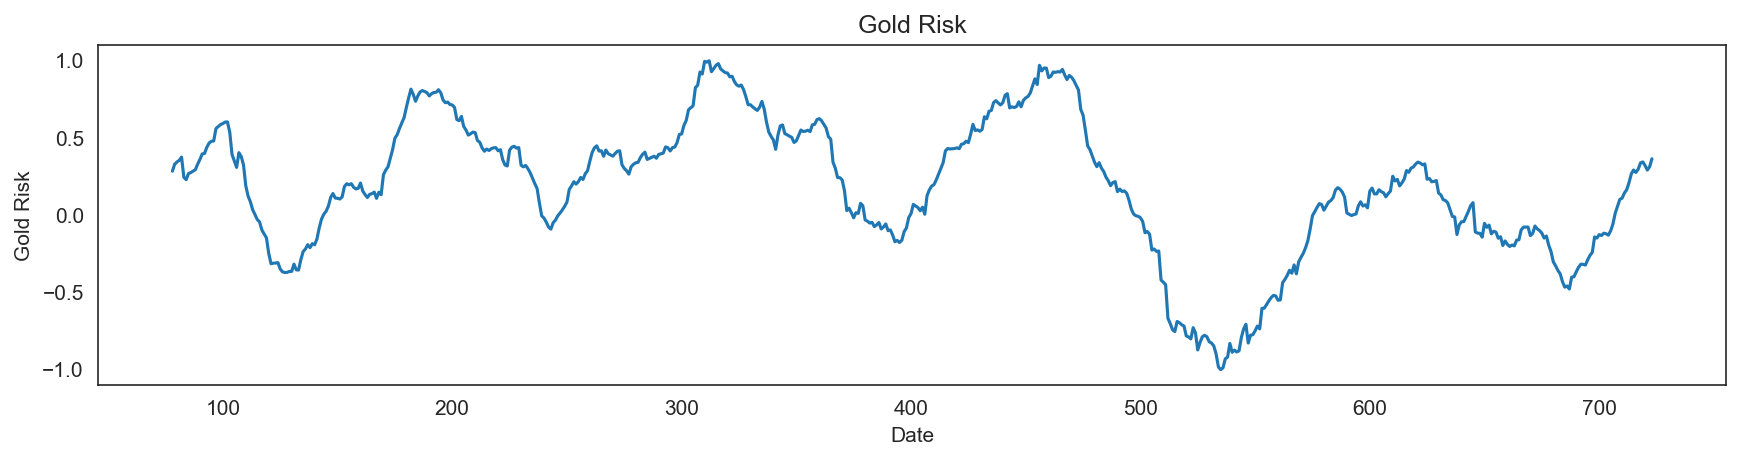

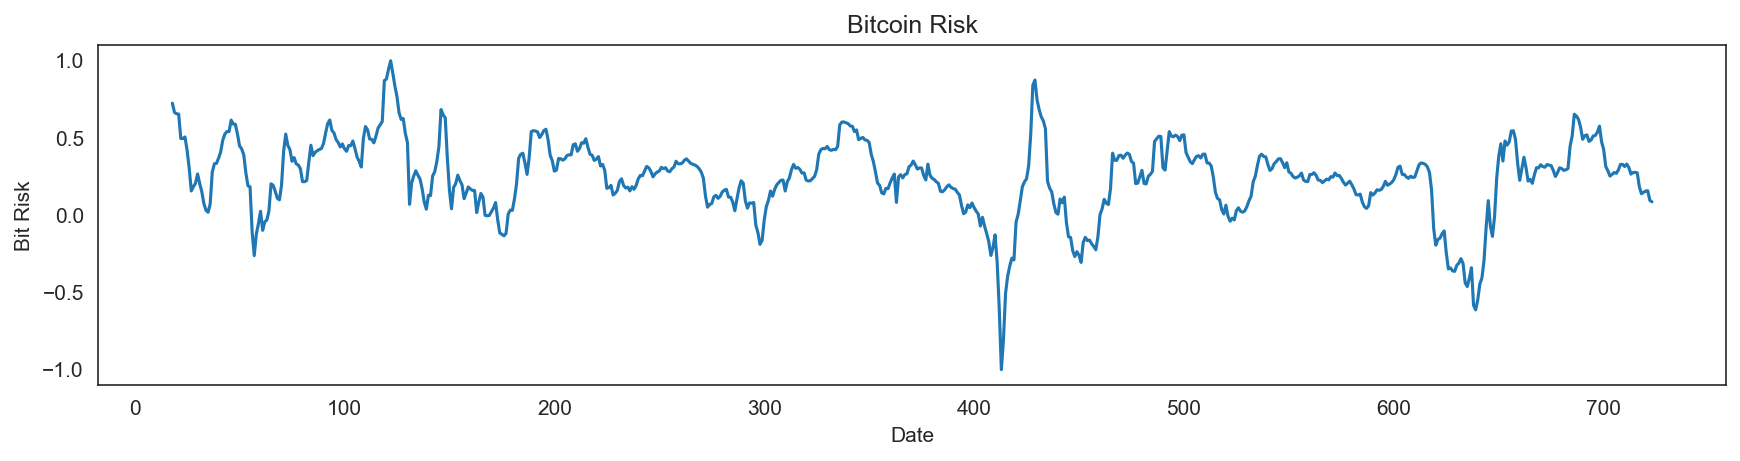

In [69]:
w = 0.8
df['Gold Risk'] = 1 - (w * df['Gold Bull Market'] + (1 - w) * df['Gold 20 Days BIAS'])
df['Gold Risk'] = normalize_1D(df['Gold Risk'].values)
df['Bit Risk'] = 1 - (w * df['Bit Bull Market'] + (1 - w) * df['Bit 5 Days BIAS'])
df['Bit Risk'] = normalize_1D(df['Bit Risk'].values)

plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Gold Risk'])
plt.title('Gold Risk')
plt.savefig('results\Features\Gold Risk.png')
plt.show()

plt.figure(figsize=(14, 3), dpi=150)
sns.lineplot(x = df['Date'], y = df['Bit Risk'])
plt.title('Bitcoin Risk')
plt.savefig('results\Features\Bit Risk.png')
plt.show()

In [70]:
df['Org Bit Price'] = b_price
df['Org Gold Price'] = g_price

In [71]:
df['Bit ARIMA'] = pd.read_csv('input\ARIMA_pred_bit.csv')['pred']

In [72]:
g_pred = pd.read_csv('input\ARIMA_pred_gold.csv')
g_pred['Gold ARIMA'] = g_pred['pred']
g_pred.drop(columns=['USD', 'Unnamed: 0', 'pred', 'Unnamed: 0.1'], inplace=True)
g_pred

,Date,Gold ARIMA
0,0,NaN
1,1,NaN
2,2,NaN
3,5,NaN
4,6,NaN
...,...,...
513,719,1323.012267
514,720,1325.342306
515,721,1337.799248
516,722,1348.252745


In [73]:
df = pd.merge(df, g_pred, how='outer')
df

,Date,Mask,Bit Day 1,Bit Day 2,Bit Day 3,Bit Price,Gold Day 1,Gold Day 2,Gold Day 3,Gold Price,...,Gold 20 Days BIAS,Bit 5 Days BIAS,Gold Bull Market,Bit Bull Market,Gold Risk,Bit Risk,Org Bit Price,Org Gold Price,Bit ARIMA,Gold ARIMA
0,0,1,NaN,NaN,NaN,-0.094255,NaN,NaN,NaN,0.177659,...,NaN,NaN,NaN,NaN,NaN,NaN,468.174011,1236.0,NaN,NaN
1,1,1,NaN,NaN,NaN,-0.134216,NaN,NaN,NaN,0.079836,...,NaN,NaN,NaN,NaN,NaN,NaN,456.859985,1220.5,NaN,NaN
2,2,1,NaN,NaN,NaN,-0.236731,NaN,NaN,NaN,0.075418,...,NaN,NaN,NaN,NaN,NaN,NaN,427.834991,1219.8,NaN,NaN
3,3,0,NaN,NaN,NaN,-0.252762,NaN,NaN,NaN,0.075418,...,NaN,NaN,NaN,NaN,NaN,NaN,423.295990,1219.8,NaN,NaN
4,4,0,NaN,NaN,NaN,-0.291155,NaN,NaN,NaN,0.075418,...,NaN,-0.534318,NaN,NaN,NaN,NaN,412.425995,1219.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,1,606.59660,607.29834,607.33030,0.403330,1331.4917,1327.9560,1329.0973,0.748186,...,-0.240963,-0.157990,-0.340918,-0.095016,0.345188,0.147794,609.054993,1326.4,610.623305,1323.012267
720,720,1,613.25214,611.89020,612.09186,0.409599,1333.3546,1336.5466,1334.6826,0.816977,...,-0.125681,-0.198267,-0.343867,-0.095631,0.321543,0.156652,610.830017,1337.3,606.515934,1325.342306
721,721,1,623.02826,624.42670,624.01290,0.422720,1341.1530,1338.6545,1340.3798,0.887031,...,-0.010587,-0.229696,-0.340583,-0.090015,0.292245,0.158510,614.544983,1348.4,612.379771,1337.799248
722,722,1,624.40090,629.48816,629.83575,0.472962,1348.4114,1343.7649,1342.3885,0.855475,...,-0.060473,-0.167855,-0.351970,-0.030218,0.314050,0.096120,628.770020,1343.4,615.568583,1348.252745


In [74]:
df['Bit ARIMA'].fillna(method='ffill', inplace=True)
df['Gold ARIMA'].fillna(method='ffill', inplace=True)

In [75]:
df.to_csv('input/Price with Feature.csv')